# 4 网络模型

现实世界的社交网络常常 非!常!大! 需要用小的网络近似. 用来近似的小网络需要反映真实世界网络的特征.

## 网络属性

衡量网络的特征.

### 度分布

Herbert A Simson: \<On a class of skew distribution funcion\>. 现实世界的网络的度数或权重常常不是正态的. 而是斜的 (skew). 如 $0.001\%$ 的人掌握全球 $1/4$ 财富; 世界上的城市中只有极少数人口特别大; 大多数网站一个月不到 1000 的访问； 耶鲁 (Yule) 分布: 生物分类学中, 少数属包含大量物种......

### 幂律分布

$\mathbb P(k\leqslant X < k+1) \sim O\left(k^{-\alpha}\right)$

* 齐夫 (Zipf) 定律: 单词出现的频率与频率表中的排名成反比 ($\alpha = 1$).
* 社交网络中入度为 $k$ 的点约占 $O(1/k^2)$ ($\alpha = 2$)
* 商品销量为 $k$ 的约占 $O(1/k^3)$ ($\alpha = 3$)

### 聚类系数

## 随机图模型

给定 $n$ 个顶点, 假设每条边存在的概率为 $p$, 构成一个随机图 $G(n,p)$. 边数的期望为 $\mathbb E(|E|) = \binom{n}{2}p$. 每个点的度数期望为 $\mathbb E(d) = (n-1)p$.

### 相变

当 $p = \dfrac{1}{n-1}$, 图的期望直径达到极大值, 称为相变点.

### 度分布

当 $d\ll n$, 某个点度数为 $d$ 的概率为

$$\mathbb P(d(i) = d)=\binom{n-1}{d} p^d (1 - p)^{n-1-d}\sim \frac{(n-1)^d}{d!}p^d(1-p)^{n-1-d}$$

### 聚类系数

随机图每个节点聚类系数期望为 
$$\frac{包含节点的三角形}{包含节点的角}=\frac{包含节点的角有第三条边}{包含节点的角}=p$$


### 路径长度




## 小世界模型

(Watts & Strogatz, 1998) 

### 规则网

如下网络被称为规则网 (regular network), 每个顶点有规律地与 $d$ 个节点相连 ($d$ 为偶数). 规则网的聚类系数:

$$\frac{包含节点的三角形}{包含节点的角}=\frac{所有三角形\times 3}{所有角}
=\frac{3n\sum_{i=1}^{d/2-1}i}{nd(d-1)/2}=\frac{3(d-2)}{4(d-1)}\approx \frac34$$


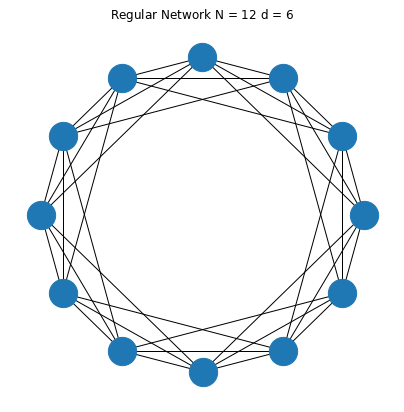

In [16]:
import networkx as nx
from matplotlib import pyplot as plt
N = 12
d = 6
plt.figure(figsize = (7,7), facecolor='white')
plt.gca().set_title('Regular Network N = $%d$ d = $%d$'%(N,d))
G = nx.Graph()
for i in range(N):
    G.add_node(chr(65+i))
for i in range(N):
    for j in range(1,1+d//2):
        G.add_edge(chr(65+i),chr(65+(i+j)%N))
pos = nx.circular_layout(G)
nx.draw_networkx_nodes(G, node_size=800, pos=pos)
nx.draw_networkx_edges(G, pos=pos)
plt.gca().axis('off')
plt.show()


### 小世界模型

对于规则网的每条边, 有 $p$ 的概率将一个顶点换成其它顶点. 则称为小世界模型 (Small-world network).


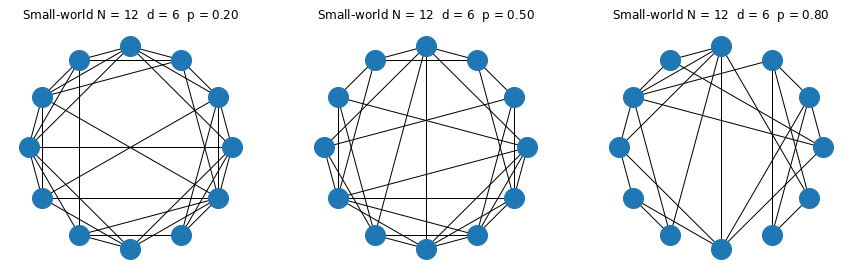

In [57]:
import networkx as nx
from matplotlib import pyplot as plt
import numpy as np
N = 12
d = 6
plt.figure(figsize = (15,4.5), facecolor='white')
for subp, p in enumerate((.2,.5,.8)):
    plt.subplot(1,3,subp+1)
    G = nx.Graph()
    for i in range(N):
        G.add_node(chr(65+i))
    for i in range(N):
        for j in range(1,1+d//2):
            G.add_edge(chr(65+i),chr(65+(i+j)%N))

    for e in list(G.edges):
        if np.random.random() < p: # has probability p to reconnect an edge
            G.remove_edge(*e)
            e = (e[0], chr((np.random.randint(N-1)+1 + ord(e[0]) - 65)%N + 65))
            G.add_edge(*e)
        
    pos = nx.circular_layout(G)
    nx.draw_networkx_nodes(G, node_size=400, pos=pos)
    nx.draw_networkx_edges(G, pos=pos)
    plt.gca().set_title('Small-world N = $%d$  d = $%d$  p = $%.2f$'%(N,d,p))
    plt.gca().axis('off')
plt.show()

## 优先链接模型

优先链接模型 (preferential attachment). 优先链接模型的度分布符合幂律分布. 但是平均聚类系数太小.

## 马太效应

### 长尾分布